In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
iris= pd.read_csv('Iris.csv')

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#we dont need Id column so we can drop it
iris=iris.drop('Id', axis=1)
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# EDA with dataset

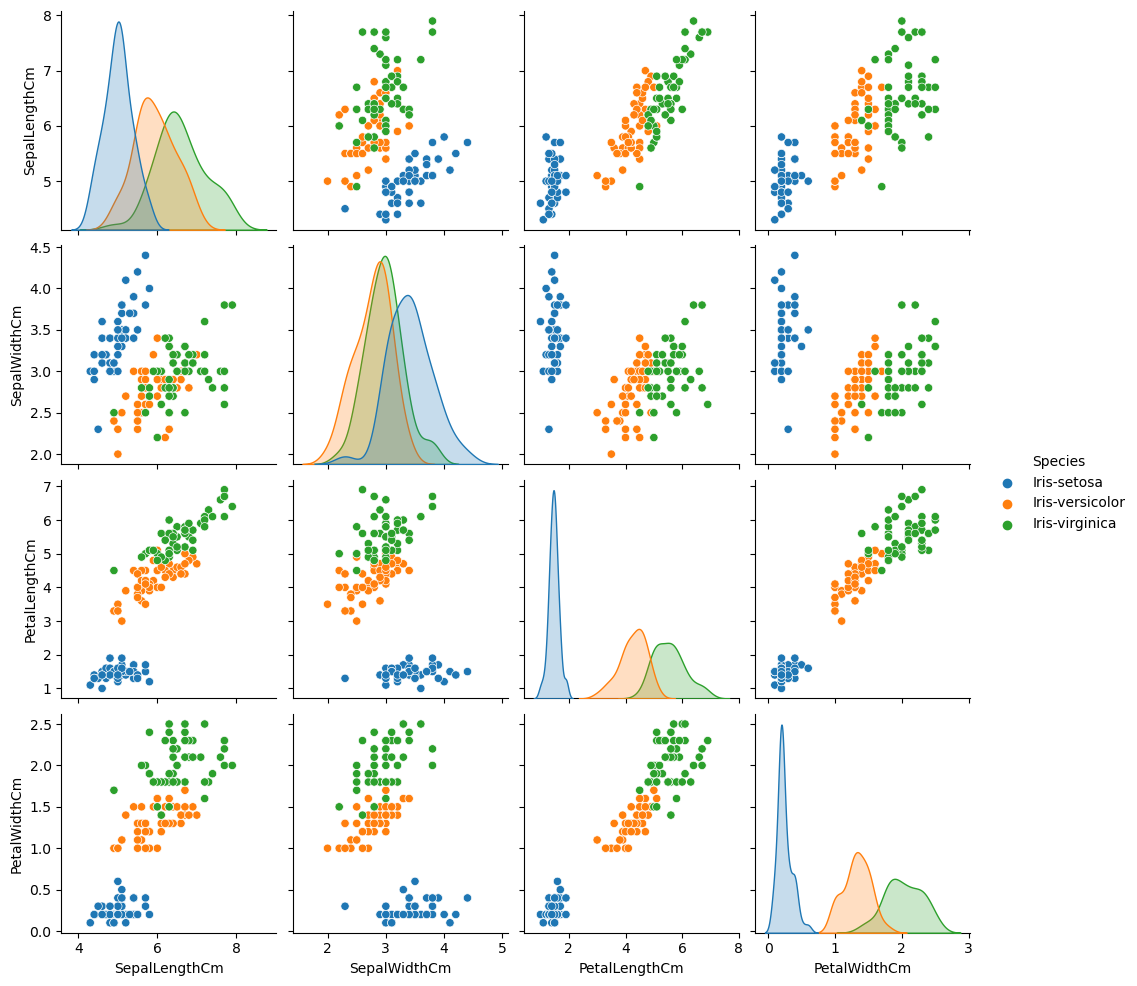

In [6]:
sns.pairplot(iris,hue='Species')

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

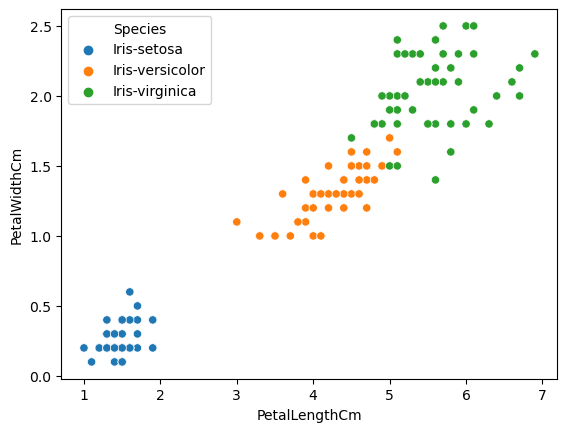

In [7]:
sns.scatterplot(iris,x='PetalLengthCm',y='PetalWidthCm',hue='Species')

<Axes: xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

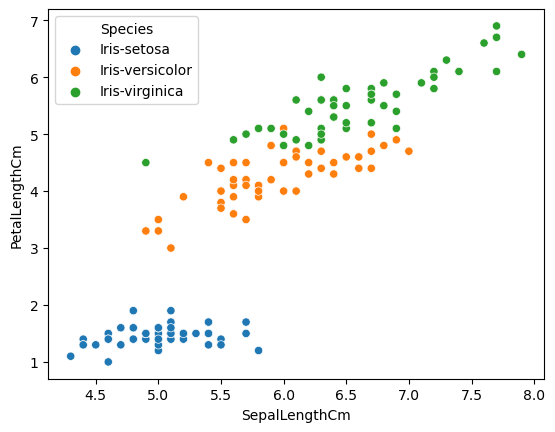

In [8]:
sns.scatterplot(iris,x='SepalLengthCm',y='PetalLengthCm',hue='Species')

<Axes: xlabel='Species', ylabel='PetalWidthCm'>

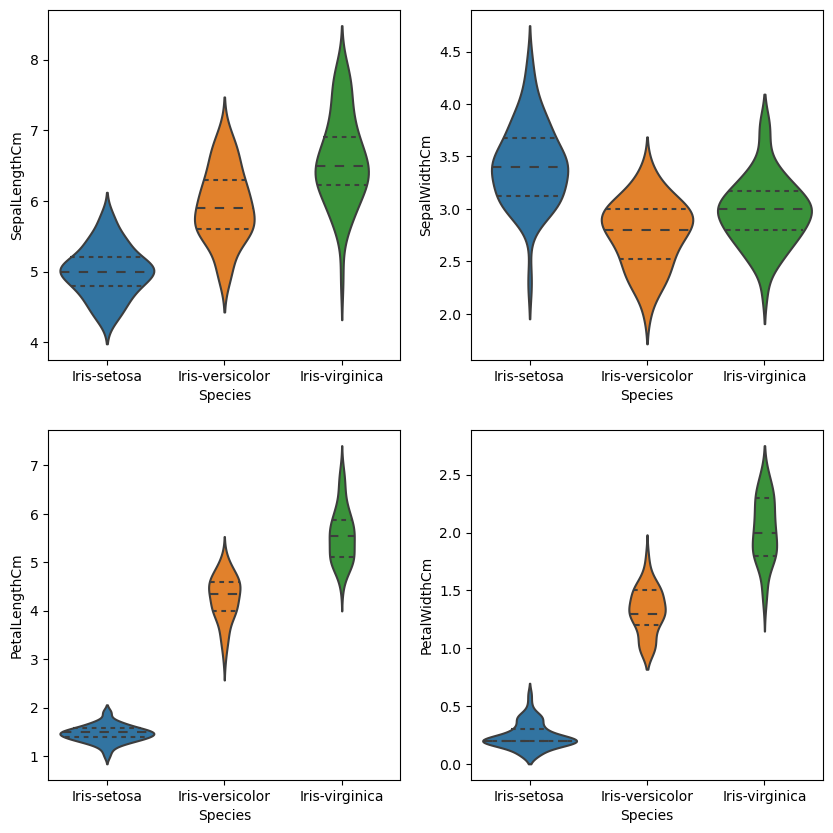

In [9]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species', y = 'SepalLengthCm', data=iris,inner='quartile')
plt.subplot(2,2,2)
sns.violinplot(x='Species', y = 'SepalWidthCm', data=iris,inner='quartile')
plt.subplot(2,2,3)
sns.violinplot(x='Species', y = 'PetalLengthCm', data=iris,inner='quartile')
plt.subplot(2,2,4)
sns.violinplot(x='Species', y = 'PetalWidthCm', data=iris,inner='quartile')

In [10]:
iris.corr()

C:\Users\chand\AppData\Local\Temp\ipykernel_2152\2141086772.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris.corr()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


C:\Users\chand\AppData\Local\Temp\ipykernel_2152\668852778.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris.corr(),annot=True)


<Axes: >

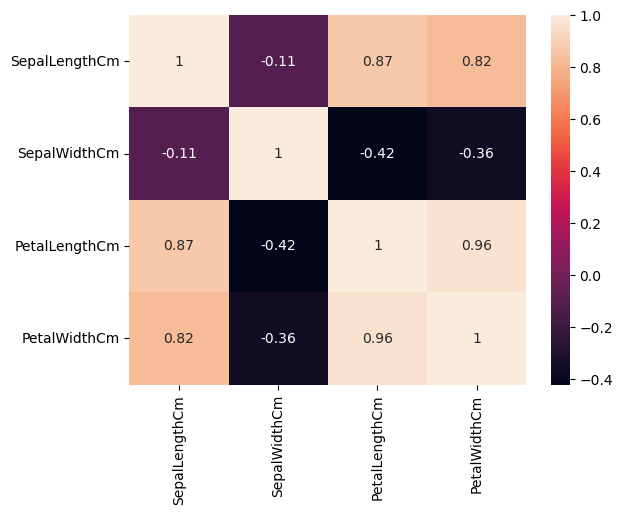

In [11]:
sns.heatmap(iris.corr(),annot=True)

# if We see the previous datavisualization and  corr(), we observe that sepal width has less correlation with other features we will build models first with all the features and later we can drop sepal width feature and build model and compare between both

In [12]:
# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression # for Logistic Regression Algorithm
from sklearn.model_selection import train_test_split # to split the dataset for training and testing 
from sklearn.neighbors import KNeighborsClassifier # KNN classifier
from sklearn import svm # for suport vector machine algorithm
from sklearn import metrics # for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier # for using DTA

In [13]:
# Steps To Be followed When Applying an Algorithm
# Split the dataset into training and testing dataset.
#The testing dataset is generally smaller than training one as it will help in training the model better.
# Select any algorithm based on the problem (classification or regression) whatever you feel may be good.
#Then pass the training dataset to the algorithm to train it. We use the .fit() method
#Then pass the testing data to the trained algorithm to predict the outcome. We use the .predict() method. 
#We then check the accuracy by passing the predicted outcome and the actual output to the model.


In [14]:
train, test = train_test_split(iris, test_size=0.25,random_state=5)

In [15]:
iris.shape

(150, 5)

In [16]:
train.shape,test.shape

((112, 5), (38, 5))

In [17]:
train_x=train.drop('Species',axis=1)
train_y=train['Species']

test_x=test.drop('Species',axis=1)
test_y=test['Species']

In [18]:
train_x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
40,5.0,3.5,1.3,0.3
115,6.4,3.2,5.3,2.3
142,5.8,2.7,5.1,1.9
69,5.6,2.5,3.9,1.1
17,5.1,3.5,1.4,0.3


# Support Vector Machine SVM

In [19]:
model=svm.SVC() #select the svm algorithm

#we train the algorithm with training data and training output
model.fit(train_x,train_y)

#we pass the testing data to stored algorithm to predict the outcome
svm_prediction= model.predict(test_x)

metrics.accuracy_score(svm_prediction,test_y)

0.9736842105263158

# SVM gave a good accuracy score, we will continue to check with different models and compare the result

# Logistic Regression

In [20]:
model = LogisticRegression()
model.fit(train_x,train_y)
logRreg_prediction=model.predict(test_x)
metrics.accuracy_score(logRreg_prediction,test_y)

0.9736842105263158

# Decision Tree

In [21]:
model = DecisionTreeClassifier()
model.fit(train_x,train_y)
DecisionTree_prediction=model.predict(test_x)
metrics.accuracy_score(DecisionTree_prediction,test_y)

0.9473684210526315

# K - Nearest Neighbors with various values of n

C:\Users\chand\AppData\Local\Temp\ipykernel_2152\3769499708.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a = pd.Series()


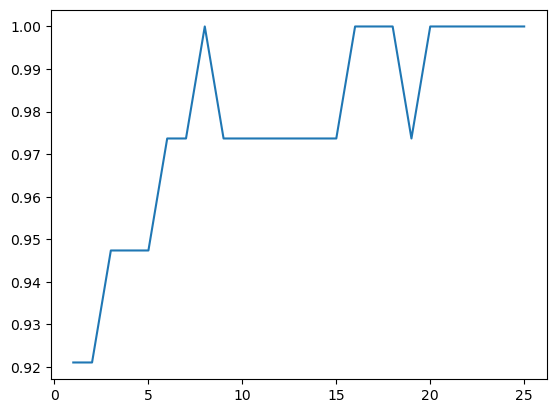

In [22]:
a_index = list(range(1,26))
a = pd.Series()
for i in list(range(1,26)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_x, train_y)
    prediction = model.predict(test_x)
    a = pd.concat([a,pd.Series(metrics.accuracy_score(prediction, test_y))],axis=0)
plt.plot(a_index, a)


# We used all the features of iris in above model, Now we will use only petal or sepal features .

In [23]:
petal = iris[['PetalLengthCm','PetalWidthCm','Species']]
sepal = iris[['SepalLengthCm','SepalWidthCm','Species']]

In [24]:
train_p,test_p = train_test_split(petal, test_size=0.3, random_state=0) #petals
train_x_p = train_p[['PetalWidthCm','PetalLengthCm']]
train_y_p = train_p.Species

test_x_p = test_p[['PetalWidthCm','PetalLengthCm']]
test_y_p = test_p.Species


train_s,test_s = train_test_split(sepal, test_size=0.3, random_state=0) #sepals
train_x_s = train_s[['SepalWidthCm','SepalLengthCm']]
train_y_s = train_s.Species

test_x_s = test_s[['SepalWidthCm','SepalLengthCm']]
test_y_s = test_s.Species

In [25]:
model=svm.SVC()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the SVM using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model=svm.SVC()
model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the SVM using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the SVM using Petals is: 0.9777777777777777
The accuracy of the SVM using Sepals is: 0.8


In [26]:
model = LogisticRegression()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Logistic Regression using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Logistic Regression using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Logistic Regression using Petals is: 0.9777777777777777
The accuracy of the Logistic Regression using Sepals is: 0.8222222222222222


In [27]:
model=DecisionTreeClassifier()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Decision Tree using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Decision Tree using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Decision Tree using Petals is: 0.9555555555555556
The accuracy of the Decision Tree using Sepals is: 0.6666666666666666


In [28]:
model=KNeighborsClassifier(n_neighbors=22) 
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the KNN using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the KNN using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the KNN using Petals is: 0.9777777777777777
The accuracy of the KNN using Sepals is: 0.8222222222222222


###### Observations:
Using Petals over Sepal for training the data gives a much better accuracy.

This was expected as we saw in the heatmap above that the correlation between the Sepal Width and Length was very low whereas the correlation between Petal Width and Length was very high.

In [29]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
